<a href="https://colab.research.google.com/github/vivekverma1019/Titanic_Problem/blob/master/Titanic_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Look At the Big Picture
* **Goal : ** Predict if a passenger survived the sinking of the Titanic or not *(Classification Task)*
* **Performance Measure : ** F1 Score


### Get the Data

In [0]:
from google.colab import files
test = files.upload()

Saving test.csv to test.csv


In [0]:
# Importing essential libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
# import dataset
df_train =  pd.read_csv('https://raw.githubusercontent.com/vivekverma1019/Titanic_Problem/master/train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Discover and Visualise the Data




In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Embarked and Age have missing values

In [0]:
# Separating Categorical and Quantitative
df_train_cat = df_train[['Survived','Pclass','Sex','SibSp','Parch','Embarked']]
df_train_quant = df_train[['Age','Fare']]

In [0]:
# A glance at Categorical vars.
for var in ['Survived','Pclass','Sex','SibSp','Parch','Embarked']:
  print(df_train_cat[var].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    645
C    169
Q     77
Name: Embarked, dtype: int64


In [0]:
# glance at quant. vars.
df_train_quant.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


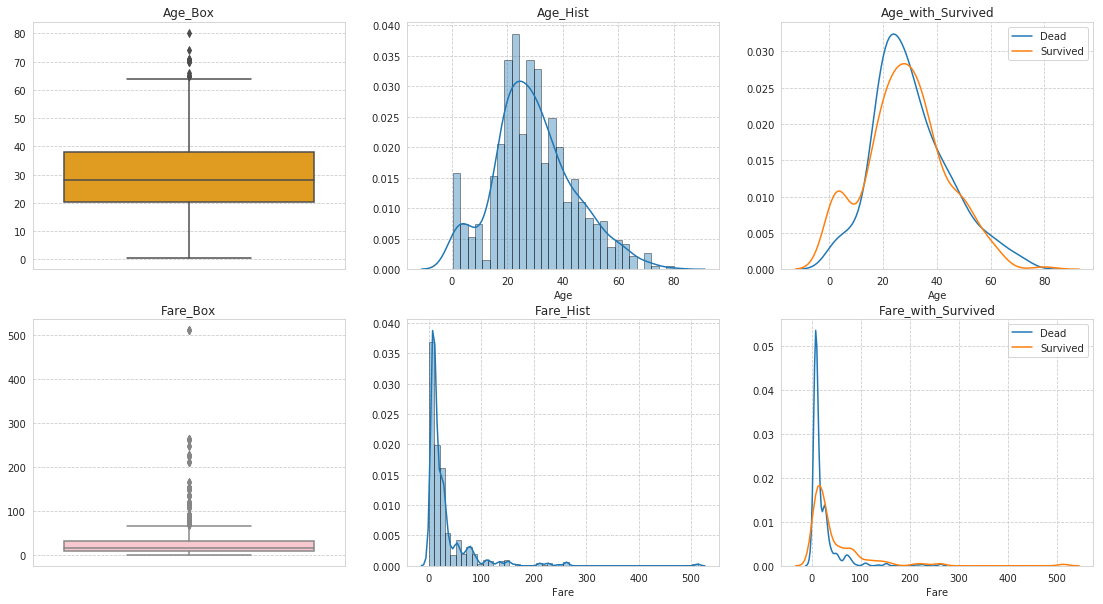

In [0]:
# Plotting Quant. vars.
fig_quant,ax_quant = plt.subplots(2,3,figsize=(19,10))   # Creating fig object
# Set titles
ax_quant[0,0].set_title('Age_Box')             
ax_quant[0,1].set_title('Age_Hist')
ax_quant[1,0].set_title('Fare_Box')
ax_quant[1,1].set_title('Fare_Hist')
ax_quant[0,2].set_title('Age_with_Survived')
ax_quant[1,2].set_title('Fare_with_Survived')
# boxplots
sns.boxplot(y=['Age'],data=df_train_quant,ax=ax_quant[0,0],color='orange')
sns.boxplot(y=['Fare'],data=df_train_quant,ax=ax_quant[1,0],color='pink')
# Histograms 
sns.distplot(a=df_train_quant['Age'].dropna(),ax=ax_quant[0,1],hist_kws=dict(edgecolor="k", linewidth=1),bins=30)
sns.distplot(a=df_train_quant['Fare'],ax=ax_quant[1,1],hist_kws=dict(edgecolor="k", linewidth=1))
# Quant vars. with D.V.
[sns.distplot(a=df_train_quant[df_train_cat['Survived']==x]['Age'].dropna(),ax=ax_quant[0,2],hist=False,label='Survived' if x==1 else 'Dead') for x in [0,1]]
[sns.distplot(a=df_train_quant[df_train_cat['Survived']==y]['Fare'].dropna(),ax=ax_quant[1,2],hist=False,label='Survived' if y==1 else 'Dead') for y in [0,1]]


In [0]:
# Check Name Column
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [0]:
# Extracting Title from Names and store as column in df_train_cat

df_train_cat['Name_title'] = df_train['Name'].apply(lambda x:x.split(', ')[1])
df_train_cat['Name_title'] = df_train_cat['Name_title'].apply(lambda x:x.split('.')[0])
df_train_cat['Name_title'].replace({'Dr':'Combined','Rev':'Combined','Col':'Combined','Mlle':'Combined','Major':'Combined','Capt':'Combined','Sir':'Combined','Don':'Combined','Lady':'Combined','the Countess':'Combined','Ms':'Combined','Mme':'Combined','Jonkheer':'Combined'},inplace=True)
df_train_cat['Name_title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Combined     27
Name: Name_title, dtype: int64

In [0]:
df_test['Name_title'] = df_test['Name'].apply(lambda x:x.split(', ')[1])
df_test['Name_title'] = df_test['Name_title'].apply(lambda x:x.split('.')[0])
df_test['Name_title'].replace({'Dr':'Combined','Rev':'Combined','Col':'Combined','Mlle':'Combined','Major':'Combined','Capt':'Combined','Sir':'Combined','Dona':'Combined','Lady':'Combined','the Countess':'Combined','Ms':'Combined','Mme':'Combined','Jonkheer':'Combined'},inplace=True)
df_test['Name_title'].value_counts()

Mr          240
Miss         78
Mrs          72
Master       21
Combined      7
Name: Name_title, dtype: int64

In [0]:
# Creating New Feature from "SibSp" and "Parch"
df_train_cat['familysize'] = df_train_cat['SibSp'] + df_train_cat['Parch'] + 1

In [0]:
df_test['familysize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [0]:
# Getting Age and Fare as Categorical in df_train_cat
df_train_cat['Age_cat'] = pd.cut(df_train_quant['Age'],bins=4) # bins =4 since min is 0 and max is 80 thus dividing 4
df_train_cat['Fare_cat'] = pd.cut(df_train_quant['Fare'],bins=5) # bins =5 since min is 0 and max is 512 thus dividing 5
df_train_cat.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Name_title,familysize,Age_cat,Fare_cat
0,0,3,male,1,0,S,Mr,2,"(20.315, 40.21]","(-0.512, 102.466]"
1,1,1,female,1,0,C,Mrs,2,"(20.315, 40.21]","(-0.512, 102.466]"
2,1,3,female,0,0,S,Miss,1,"(20.315, 40.21]","(-0.512, 102.466]"
3,1,1,female,1,0,S,Mrs,2,"(20.315, 40.21]","(-0.512, 102.466]"
4,0,3,male,0,0,S,Mr,1,"(20.315, 40.21]","(-0.512, 102.466]"


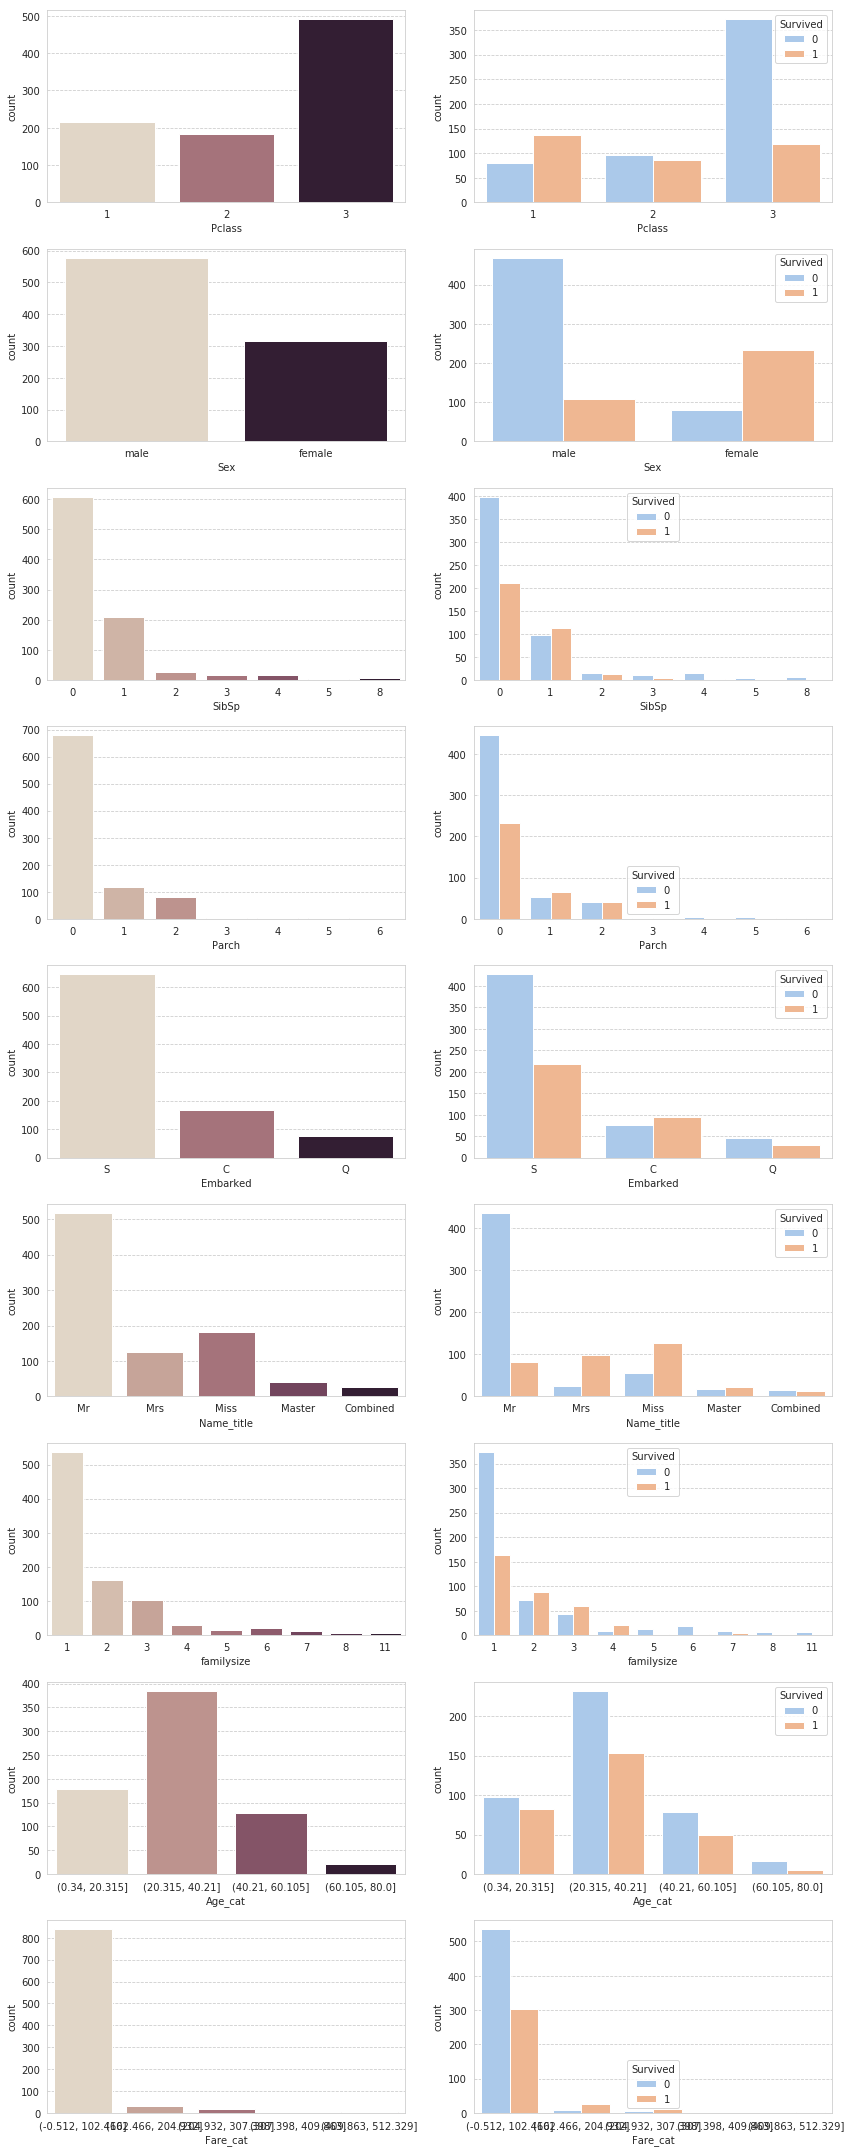

In [0]:
# Plotting Categorical Variables
listx = list(zip(range(len(df_train_cat.columns)-1),df_train_cat.columns.drop('Survived')))
fig_cat,ax_cat = plt.subplots(len(df_train_cat.columns)-1,2,figsize=(12,30))
# Countplot
for i in range(len(listx)):
    sns.countplot(x=listx[i][1],data=df_train_cat,ax=ax_cat[listx[i][0],0],palette="ch:.25")
# Countplot with Survived
for j in range(len(listx)):
    sns.countplot(x=listx[j][1],hue='Survived',data=df_train_cat,ax=ax_cat[listx[j][0],1],palette="pastel")
plt.tight_layout()

In [0]:
# Final Dataframes to train
df_train_final = pd.concat([df_train_cat,df_train_quant],axis=1).drop(['Age_cat','Fare_cat'],axis=1) # Quants. as it is

In [0]:
df_train_final.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Name_title,familysize,Age,Fare
0,0,3,male,1,0,S,Mr,2,22.0,7.2500
1,1,1,female,1,0,C,Mrs,2,38.0,71.2833
2,1,3,female,0,0,S,Miss,1,26.0,7.9250
3,1,1,female,1,0,S,Mrs,2,35.0,53.1000
4,0,3,male,0,0,S,Mr,1,35.0,8.0500


In [0]:
df_train_final.corr()

,Survived,Pclass,SibSp,Parch,familysize,Age,Fare
Survived,1.000000,-0.338481,-0.035322,0.081629,0.016639,-0.077221,0.257307
Pclass,-0.338481,1.000000,0.083081,0.018443,0.065997,-0.369226,-0.549500
SibSp,-0.035322,0.083081,1.000000,0.414838,0.890712,-0.308247,0.159651
Parch,0.081629,0.018443,0.414838,1.000000,0.783111,-0.189119,0.216225
familysize,0.016639,0.065997,0.890712,0.783111,1.000000,-0.301914,0.217138
Age,-0.077221,-0.369226,-0.308247,-0.189119,-0.301914,1.000000,0.096067
Fare,0.257307,-0.549500,0.159651,0.216225,0.217138,0.096067,1.000000


In [0]:
df_train_final['familysize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: familysize, dtype: int64

In [0]:
##
df_test['PclassX'] = df_test.Pclass.replace({1:'First',2:'Second', 3:'Third'})
df_test['familysize'] = df_test.familysize.replace({7:6,8:6,11:6})

In [0]:
# Statistical Modelling for finding Association between variables
df_train_final['PclassX'] = df_train_final.Pclass.replace({1:'First',2:'Second', 3:'Third'})
df_train_final['familysize'] = df_train_final.familysize.replace({7:6,8:6,11:6})
model = sm.GLM.from_formula("Survived ~ Sex+PclassX+Age+Fare+Parch+SibSp+Embarked+Name_title+familysize", family=sm.families.Binomial(), data=df_train_final)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      699
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -291.83
Date:                Wed, 01 May 2019   Deviance:                       583.66
Time:                        00:55:07   Pearson chi2:                     725.
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               24.3383   1.72e+04      0.001      0.999   -3.37e+04    3.38e+04
Sex[T.male]            -22.7355   1.72e+04     -0.001      0.999   -3.38e+04    3.37e+04
PclassX[T.Second]       -1.3168      0.360     -3.655      0.000      -2.023      -0.611
PclassX[T.Third]        -2.3384      0.369     -6.331      0.000      -3.062      -1.614
Embarked[T.Q]           -1.0032      0.589     -1.702      0.089      -2.159       0.152
Embarked[T.S]           -0.4663      0.288     -1.617      0.106      -1.032       0.099
Name_title[T.Master]     3.3292      0.833      3.997      0.000       1.697       4.962
Name_title[T.Miss]     -19.9955   1.72e+04     -0.001      0.999   -3.38e+04    3.37e+04
Name_title[T.Mr]        -0.1048      0.592     -0.177      0.860      -1.265       1.056
Name_title[T.Mrs]      -19.0826   1.72e+04     -0.001      0.999   -3.38e+04    3.37e+04
Age                     -0.0323      0.010     -3.229      0.001      -0.052      -0.013
Fare                     0.0030      0.003      1.020      0.308      -0.003       0.009
Parch                   -0.1420      0.554     -0.256      0.798      -1.228       0.944
SibSp                   -0.4148      0.541     -0.767      0.443      -1.475       0.645
familysize              -0.1923      0.584     -0.329      0.742      -1.338       0.953
========================================================================================
"""

### Prepare the Data For Machine Learning Algorithms

In [0]:
#handling missing values
df_train_final['Age'].fillna(np.mean(df_train_final['Age']),inplace=True)

In [0]:
## 
df_test['Age'].fillna(np.mean(df_test['Age']),inplace=True)

In [0]:
##
df_test['Fare'].fillna(np.mean(df_test['Fare']),inplace=True)

In [0]:
# Creating Final Variables
df_train_final = pd.get_dummies(df_train_final, columns=['Name_title',"PclassX",'Embarked','Sex','familysize'], drop_first=False)

In [0]:
##
df_test = pd.get_dummies(df_test, columns=['Name_title',"PclassX",'Embarked','Sex','familysize'], drop_first=False)

In [0]:
df_train_final.drop(['Pclass','SibSp','Parch'], axis=1, inplace=True)
pd.set_option('display.max_columns',200)

In [0]:
##
df_test.drop(['Pclass','SibSp','Parch'], axis=1, inplace=True)

In [0]:
df_train_final.head()

,Survived,Age,Fare,Name_title_Combined,Name_title_Master,Name_title_Miss,Name_title_Mr,Name_title_Mrs,PclassX_First,PclassX_Second,PclassX_Third,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,familysize_1,familysize_2,familysize_3,familysize_4,familysize_5,familysize_6
0,0,22.0,7.2500,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
1,1,38.0,71.2833,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0
3,1,35.0,53.1000,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0
4,0,35.0,8.0500,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0


In [0]:
df_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [0]:
df_test.head()

,Age,Fare,Name_title_Combined,Name_title_Master,Name_title_Miss,Name_title_Mr,Name_title_Mrs,PclassX_First,PclassX_Second,PclassX_Third,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,familysize_1,familysize_2,familysize_3,familysize_4,familysize_5,familysize_6
0,34.5,7.8292,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0
1,47.0,7.0000,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0
2,62.0,9.6875,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0
3,27.0,8.6625,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0
4,22.0,12.2875,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0


In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
Age                    418 non-null float64
Fare                   418 non-null float64
Name_title_Combined    418 non-null uint8
Name_title_Master      418 non-null uint8
Name_title_Miss        418 non-null uint8
Name_title_Mr          418 non-null uint8
Name_title_Mrs         418 non-null uint8
PclassX_First          418 non-null uint8
PclassX_Second         418 non-null uint8
PclassX_Third          418 non-null uint8
Embarked_C             418 non-null uint8
Embarked_Q             418 non-null uint8
Embarked_S             418 non-null uint8
Sex_female             418 non-null uint8
Sex_male               418 non-null uint8
familysize_1           418 non-null uint8
familysize_2           418 non-null uint8
familysize_3           418 non-null uint8
familysize_4           418 non-null uint8
familysize_5           418 non-null uint8
familysize_6           418 non-null uint8
dtypes: f

In [0]:
df_train_final.corr()['Survived'].sort_values(ascending=False)

Survived               1.000000
Sex_female             0.543351
Name_title_Mrs         0.339040
Name_title_Miss        0.327093
PclassX_First          0.285904
Fare                   0.257307
Embarked_C             0.171485
familysize_2           0.163157
familysize_3           0.143869
familysize_4           0.128347
PclassX_Second         0.093349
Name_title_Master      0.085221
Name_title_Combined    0.022030
Embarked_Q             0.003650
familysize_5          -0.049466
Age                   -0.069809
familysize_6          -0.113984
Embarked_S            -0.152675
familysize_1          -0.203367
PclassX_Third         -0.322308
Sex_male              -0.543351
Name_title_Mr         -0.549199
Name: Survived, dtype: float64

In [0]:
# Separating dependent and independent variables

X = df_train_final.drop(['Survived'], axis = 1)
y = df_train_final["Survived"]


In [0]:
# Splitting train/dev/test

from sklearn.model_selection import train_test_split
train_X, dev_test_X, train_y, dev_test_y = train_test_split(X,y,test_size = .33, random_state = 0)


In [0]:
# spiltting dev/test

dev_X, test_X, dev_y, test_y = train_test_split(dev_test_X,dev_test_y,test_size = .5, random_state = 0)


In [0]:
# feature scaling of AGe and Fare

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_X[['Age','Fare']] = sc.fit_transform(train_X[['Age','Fare']])


In [0]:
dev_X[['Age','Fare']] = sc.fit_transform(dev_X[['Age','Fare']])
test_X[['Age','Fare']] = sc.fit_transform(test_X[['Age','Fare']])

### Select and Train Model

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold,StratifiedShuffleSplit, cross_val_score

In [0]:
model_lst = []
train_lst = []
dev_lst = []
cross_val_lst =[]
test_lst =[]
def fit_model(model,model_name):
  model.fit(train_X,train_y)
  y_pred_train = model.predict(train_X)
  y_pred_dev = model.predict(dev_X)
  global model_lst
  model_lst.append(model_name)
  global train_lst
  train_lst.append(f1_score(train_y,y_pred_train))
  global dev_lst
  dev_lst.append(f1_score(dev_y,y_pred_dev))
  cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=0)
  accuracies = cross_val_score(model, X,y, cv = cv, scoring='f1')
  global cross_val_lst
  cross_val_lst.append(accuracies.mean())
  global test_lst
  test_lst.append(f1_score(test_y,model.predict(test_X)))

In [0]:
fit_model(LogisticRegression(C=10),"Logistic Regression")

In [0]:
fit_model(KNeighborsClassifier(metric='minkowski', p=2),"KNN")

In [0]:
fit_model(SVC(C=2.5,gamma=0.01),"SVM")

In [0]:
fit_model(DecisionTreeClassifier(criterion= 'gini', max_depth= 5,random_state=0),"Decision Tree")

In [0]:
fit_model(RandomForestClassifier(criterion='entropy',max_depth= 8, n_estimators= 150,max_features='auto'),"Random Forest")

In [0]:
fit_model(AdaBoostClassifier(),"Adaboost")

In [0]:
fit_model(GradientBoostingClassifier(),"Gradient Boosting")

In [0]:
fit_model(XGBClassifier(),"XGB")

In [0]:
df = pd.DataFrame(model_lst,columns=['Model'])

In [0]:
df['Training F1'] = train_lst
df['Dev F1'] = dev_lst
df['Cross_val'] = cross_val_lst
df['Test F1'] = test_lst

In [0]:
df

,Model,Training F1,Dev F1,Cross_val,Test F1
0,Logistic Regression,0.777273,0.849558,0.774833,0.690265
1,KNN,0.823529,0.735849,0.617029,0.637931
2,SVM,0.742729,0.792793,0.694941,0.660714
3,Decision Tree,0.816327,0.785714,0.738285,0.615385
4,Random Forest,0.862559,0.822430,0.753850,0.703704
5,Adaboost,0.804348,0.796296,0.753224,0.690265
6,Gradient Boosting,0.886878,0.818182,0.764023,0.725490
7,XGB,0.846154,0.836364,0.773285,0.699029


In [0]:
# Reshaping DataFrame
df = pd.melt(df, id_vars="Model", var_name="Set", value_name="F1 Score")
df

,Model,Set,F1 Score
0,Logistic Regression,Training F1,0.777273
1,KNN,Training F1,0.823529
2,SVM,Training F1,0.742729
3,Decision Tree,Training F1,0.816327
4,Random Forest,Training F1,0.862559
5,Adaboost,Training F1,0.804348
6,Gradient Boosting,Training F1,0.886878
7,XGB,Training F1,0.846154
8,Logistic Regression,Dev F1,0.849558
9,KNN,Dev F1,0.735849


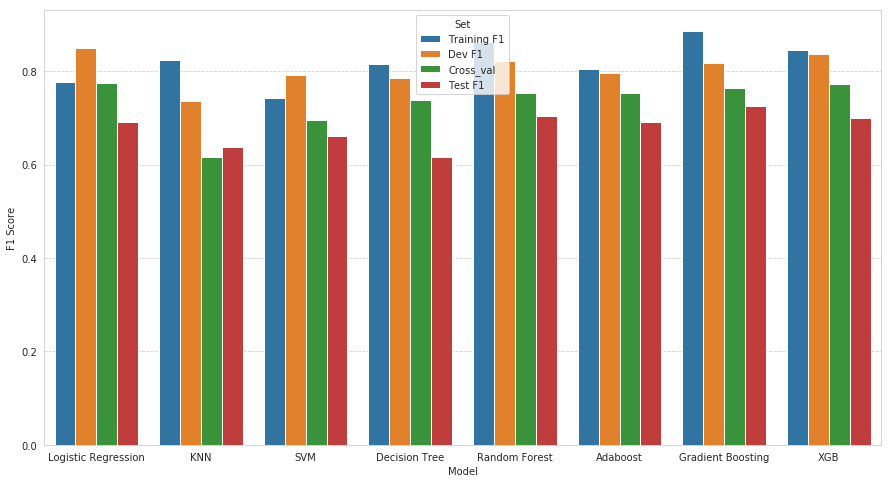

In [0]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig,ax = plt.subplots(1,1,figsize=(15,8))
sns.barplot(x='Model', y='F1 Score', hue='Set', data=df,ax=ax)

**From above barplot we can see that Dev Set Accuracy for Logistic Regression Model is greater than all and Cross val score is almost same for Logistic Regression and XGB**

**Decision Tree , Random Forest and Bagging Classifier are Overfitting **

In [0]:
# Find Best parameters for Decision Tree
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
criterion=["entropy", "gini"]

param = {'max_depth':max_depth,  
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y) 

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 30), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [0]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 5}
0.8417508417508418
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [0]:
# Find Best parameters for Random Forest
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [140, 145, 150, 155, 160], 'max_depth': range(1, 10), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 155}
0.841044776119403
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=155, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Fine Tune Selected Model

**We Choose Logistic Regression as Final Model** :
  * Its not Overfitting unlike XGB
  * Maximum Cross_val_score

**Gradient Boosting is Working well on Unseen Data than Logistic Regression**

In [0]:
# Finding best Parameters for Logistic Regression
c = [0.1,0.01,0.001,0.5,1,2,2.5,10,100,1000]
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'C':c
              
        }
grid = GridSearchCV(estimator=LogisticRegression(),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 0.01, 0.001, 0.5, 1, 2, 2.5, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'C': 10}
0.8361940298507463
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


### Submission